In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot
import shutil

In [10]:
root_dir = 'input/'
input_txt = 'json2.txt'
input_img = 'input.png'
input_dep = 'depth.png'

In [11]:
def show(image):
    matplotlib.pyplot.imshow(image[:,:,::-1])
    matplotlib.pyplot.show()
    print(image.shape)

In [12]:

f = open(root_dir + input_txt, 'r')
str_array = f.read().replace('[', '').replace(']', '').replace('\n', '').replace('  ', ' ').split(' ')
for i in range(0, len(str_array)):
    str_array[i] = float(str_array[i])
p = np.reshape(str_array, (25, 3))
print(p)

[[1.7143031e+02 2.0015712e+02 8.6794281e-01]
 [1.5581148e+02 2.3538559e+02 7.7691215e-01]
 [1.6229388e+02 2.3416911e+02 9.1575706e-01]
 [2.0417976e+02 2.2632091e+02 8.3205986e-01]
 [1.8457591e+02 1.9239560e+02 8.7872672e-01]
 [1.5063326e+02 2.3540645e+02 6.5880471e-01]
 [1.9366696e+02 2.2631374e+02 1.6518694e-01]
 [1.8192973e+02 1.9370840e+02 2.3153733e-01]
 [1.5711885e+02 3.3720410e+02 6.6553271e-01]
 [1.6108456e+02 3.3850089e+02 7.0431817e-01]
 [1.8188824e+02 4.0899738e+02 7.2835821e-01]
 [1.5056511e+02 4.7690662e+02 6.1257130e-01]
 [1.5186255e+02 3.3591190e+02 5.8379757e-01]
 [1.7142012e+02 4.0510614e+02 6.0650319e-01]
 [1.5190706e+02 4.6643817e+02 5.6232023e-01]
 [1.6238477e+02 1.9500281e+02 8.8245952e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.5054753e+02 2.0540083e+02 9.1062087e-01]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.7800090e+02 4.6516177e+02 3.6173925e-01]
 [1.7411691e+02 4.6509644e+02 3.6294621e-01]
 [1.4277657e+02 4.7690387e+02 2.8250152e-01]
 [1.701521

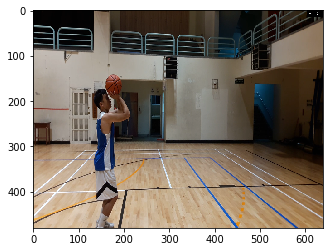

(480, 640, 3)


In [13]:
image = cv2.imread(root_dir + input_img)
show(image)

In [14]:
BODY_25_COLOR = [
    ( 85,   0, 255),
    (  0,   0, 255),
    (  0,  85, 255),
    (  0, 170, 255),
    (  0, 255, 255),
    (  0, 255, 170),
    (  0, 255,  85),
    (  0, 255,   0),
    (  0,   0, 255),
    ( 85, 255,   0),
    (170, 255,   0),
    (255, 255,   0),
    (255, 170,   0),
    (255,  85,   0),
    (255,   0,   0),
    (170,   0, 255),
    (255,   0, 170),
    (255,   0, 255),
    (255,   0,  85),
    (255,   0,   0),
    (255,   0,   0),
    (255,   0,   0),
    (255, 255,   0),
    (255, 255,   0),
    (255, 255,   0)
]

In [15]:
BODY_25_PAIR = [
    ( 1,  8),
    ( 1,  2),
    ( 1,  5),
    ( 2,  3),
    ( 3,  4),
    ( 5,  6),
    ( 6,  7),
    ( 8,  9),
    ( 9, 10),
    (10, 11),
    ( 8, 12),
    (12, 13),
    (13, 14),
    ( 1,  0),
    ( 0, 15),
    (15, 17),
    ( 0, 16),
    (16, 18),
    (14, 19),
    (19, 20),
    (14, 21),
    (11, 22),
    (22, 23),
    (11, 24)
]

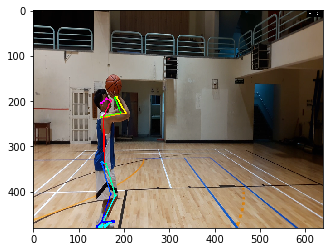

(480, 640, 3)


True

In [16]:
def point(p, index):
    return (int(p[index][0]), int(p[index][1]))

if os.path.isdir('output'):
    shutil.rmtree('output')
os.mkdir('output')
image = cv2.imread(root_dir + input_img)
for i in range(0, len(p)):
    x = int(p[i][0])
    y = int(p[i][1])
    if x == 0 and y == 0:
        continue
    cv2.circle(image, (x, y), 3, BODY_25_COLOR[i], -1)
for (first, second) in BODY_25_PAIR:
    if point(p, first) == (0, 0) or point(p, second) == (0, 0):
        continue
    cv2.line(image, point(p, first), point(p, second), BODY_25_COLOR[second], 2)
show(image)
cv2.imwrite('output/output-rpg.png', image)

(480, 640)
(480, 640)
171 200
155 235
162 234
204 226
184 192
150 235
193 226
181 193
157 337
161 338
181 408
150 476
151 335
171 405
151 466
162 195
150 205
178 465
174 465
142 476
170 467
159 476
145 476


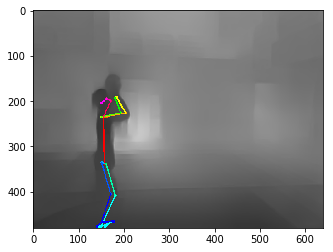

(480, 640, 3)


In [17]:
#def point(p, index):
#    return (int(p[index][0] * image_dep.shape[0] / image.shape[0]), int(p[index][1] * image_dep.shape[1] / image.shape[1]))

image_dep = cv2.imread(root_dir + input_dep)
print(image.shape[:2])
print(image_dep.shape[:2])
for i in range(0, len(p)):
#    x = int(p[i][0] * image_dep.shape[0] / image.shape[0])
#    y = int(p[i][1] * image_dep.shape[1] / image.shape[1])
    x = int(p[i][0])
    y = int(p[i][1])
    if x == 0 and y == 0:
        continue
    print(x, y)
    cv2.circle(image_dep, (x, y), 3, BODY_25_COLOR[i], -1)
for (first, second) in BODY_25_PAIR:
    if point(p, first) == (0, 0) or point(p, second) == (0, 0):
        continue
    cv2.line(image_dep, point(p, first), point(p, second), BODY_25_COLOR[second], 2)
show(image_dep)